In [51]:
'''
Importing in all of my required libraries for Exploritory Data Analysis
'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from function import set_up_participants_df, plot_grouped_metrics, plot_grouped_metrics_hist, plot_grouped_metrics_boxplot, plot_grouped_metrics_barplot, plot_grouped_metrics_scatter, normalize_data, standardize_data, convert_scaled_to_raw, plot_participant_id_over_time



In [52]:
'''
Notepad Section is designated for the creation of adding new columns to the dataset
'''

# Reload the original dataframe
hfd_df_original = pd.read_csv('data/health_fitness_dataset_primary.csv')
# Set the index to the participant_id   
hfd_df_original.set_index('participant_id', inplace=True)

# Convert the date column to a datetime object
hfd_df_original['date'] = pd.to_datetime(hfd_df_original['date'])

hfd_df_original['year'] = hfd_df_original['date'].dt.year
hfd_df_original['month'] = hfd_df_original['date'].dt.month
hfd_df_original['day'] = hfd_df_original['date'].dt.day

# Adding a coverstion table from kg to pounds and cm to inches
hfd_df_original['weight_pds'] = hfd_df_original['weight_kg'] * 2.20462
hfd_df_original['height_in'] = hfd_df_original['height_cm'] * 0.393701

# Create a new column for stress level
hfd_df_original['intensity_lvl_value'] = hfd_df_original['intensity'].map({'Low': 1, 'Medium': 2, 'High': 3})

# Set activity_type to a value
hfd_df_original['activity_type_value'] = hfd_df_original['activity_type'].map(
    {'Yoga': 1, 'Weight Training': 2, 'HIIT': 3, 'Dancing': 4, 'Cycling': 5, 'Basketball': 6, 'Tennis': 7, 'Walking': 8,   
    'Swimming': 9, 'Running': 10})

hfd_df_original['gender'] = hfd_df_original['gender'].map({'Male': 0, 'Female': 1})
hfd_df_original['smoking_status'] = hfd_df_original['smoking_status'].map({'Non-Smoker': 0, 'Smoker': 1})

# Creating a new column for sleep quality and stress level
hfd_df_original['Stressful_sleep_val'] = hfd_df_original['hours_sleep'] * hfd_df_original['stress_level']

hfd_df_original['exercise_intensity_daily_step_val'] = hfd_df_original['intensity_lvl_value'] * hfd_df_original['daily_steps']


# utilize a function to set up data frames for individual participants and pull out participant 1
participant_1 = set_up_participants_df(hfd_df_original, 1)

hfd_df_male = hfd_df_original.loc[hfd_df_original['gender'] == 'M']
hfd_df_female = hfd_df_original.loc[hfd_df_original['gender'] == 'F']

In [53]:
hfd_df_original.head(5)

date  age  gender  height_cm  weight_kg    activity_type  \
participant_id                                                                  
1              2024-01-01   56     NaN      165.3       53.7          Dancing   
1              2024-01-04   56     NaN      165.3       53.9         Swimming   
1              2024-01-05   56     NaN      165.3       54.2         Swimming   
1              2024-01-07   56     NaN      165.3       54.4  Weight Training   
1              2024-01-09   56     NaN      165.3       54.7         Swimming   

                duration_minutes intensity  calories_burned  avg_heart_rate  \
participant_id                                                                
1                             41       Low              3.3             103   
1                             28       Low              2.9             102   
1                             21    Medium              2.6             126   
1                             99    Medium             10.7             141   
1                            100    Medium             12.7             112   

                ...  fitness_level  year  month  day  weight_pds  height_in  \
participant_id  ...                                                           
1               ...           0.04  2024      1    1  118.388094  65.078775   
1               ...           0.07  2024      1    4  118.829018  65.078775   
1               ...           0.09  2024      1    5  119.490404  65.078775   
1               ...           0.21  2024      1    7  119.931328  65.078775   
1               ...           0.33  2024      1    9  120.592714  65.078775   

                intensity_lvl_value  activity_type_value Stressful_sleep_val  \
participant_id                                                                 
1                                 1                    4                19.8   
1                                 1                    9                56.7   
1                                 2                    9                43.4   
1                                 2                    2                57.6   
1                                 2                    9                 7.1   

                exercise_intensity_daily_step_val  
participant_id                                     
1                                            7128  
1                                            7925  
1                                           15114  
1                                           22240  
1                                           10812  

[5 rows x 30 columns]

In [54]:
age_group = list(range(15,71,10))
age_labels = [f'{i}-{i+9}' for i in age_group[:-1]]

hfd_df_original['age_group'] = pd.cut(hfd_df_original['age'], bins=age_group, labels=age_labels, right=False)

hfd_df_male['age_group'] = pd.cut(hfd_df_male['age'], bins=age_group, labels=age_labels, right=False)
hfd_df_male.groupby('age_group')['avg_heart_rate'].mean().reset_index()
hfd_df_male.groupby('age_group')['fitness_level'].mean().reset_index()
hfd_df_male.groupby('age_group')['stress_level'].mean().reset_index()

hfd_df_female['age_group'] = pd.cut(hfd_df_female['age'], bins=age_group, labels=age_labels, right=False)
hfd_df_female.groupby('age_group')['avg_heart_rate'].mean().reset_index()
hfd_df_female.groupby('age_group')['fitness_level'].mean().reset_index()
hfd_df_female.groupby('age_group')['stress_level'].mean().reset_index()

age_group_avg_heart_rate = hfd_df_original.groupby('age_group')['avg_heart_rate'].mean().reset_index()

#print(age_group_avg_heart_rate)

age_group_avg_fitness_level = hfd_df_original.groupby('age_group')['fitness_level'].mean().reset_index()

age_group_avg_stress_level = hfd_df_original.groupby('age_group')['stress_level'].mean().reset_index()

C:\Users\jcffo\AppData\Local\Temp\ipykernel_16208\38074945.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hfd_df_male.groupby('age_group')['avg_heart_rate'].mean().reset_index()
C:\Users\jcffo\AppData\Local\Temp\ipykernel_16208\38074945.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hfd_df_male.groupby('age_group')['fitness_level'].mean().reset_index()
C:\Users\jcffo\AppData\Local\Temp\ipykernel_16208\38074945.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to a

In [55]:
hfd_df_male = hfd_df_original.loc[hfd_df_original['gender'] == 'M']
hfd_df_female = hfd_df_original.loc[hfd_df_original['gender'] == 'F']


In [56]:
hfd_df_original.isnull().sum()
#hfd_df_original.dtypes
#hfd_df_original.head(5)

date                                      0
age                                       0
gender                               687701
height_cm                                 0
weight_kg                                 0
activity_type                             0
duration_minutes                          0
intensity                                 0
calories_burned                           0
avg_heart_rate                            0
hours_sleep                               0
stress_level                              0
daily_steps                               0
hydration_level                           0
bmi                                       0
resting_heart_rate                        0
blood_pressure_systolic                   0
blood_pressure_diastolic                  0
health_condition                     490275
smoking_status                       687701
fitness_level                             0
year                                      0
month                           

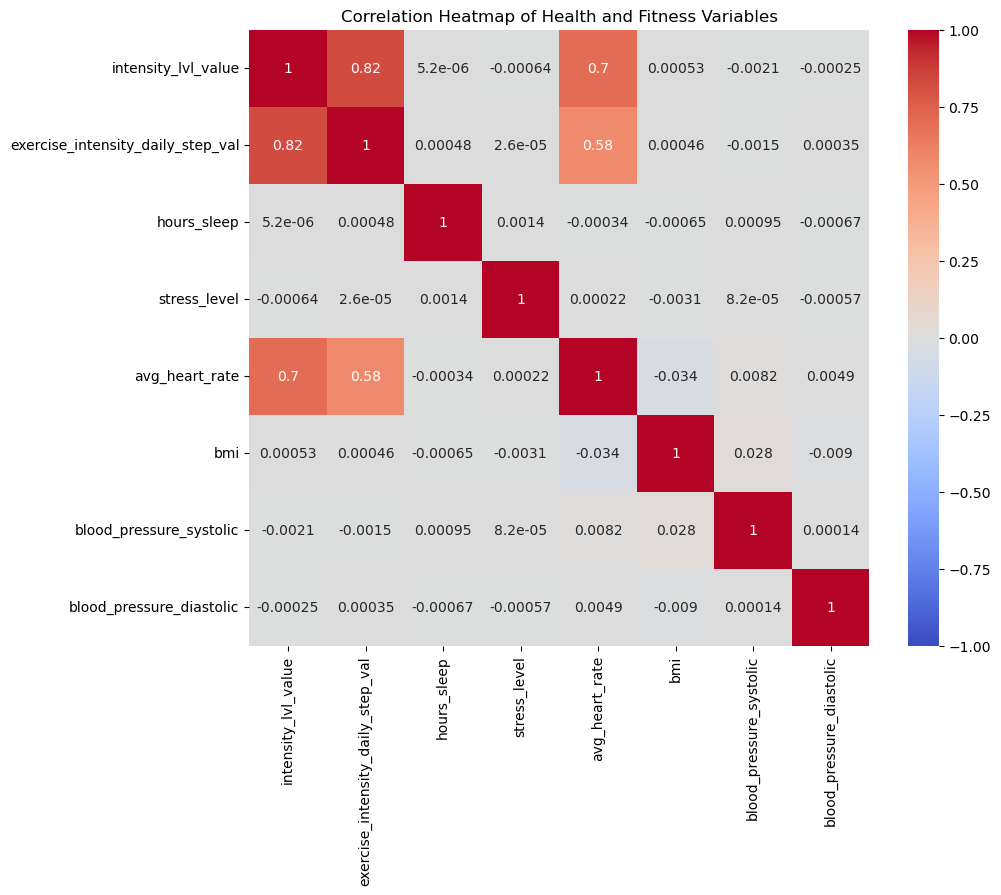

In [57]:
hfd_df_original.columns = hfd_df_original.columns.str.strip().str.lower()

crit_columns = ['intensity', 'daily_steps', 'hours_sleep', 'stress_level', 
                    'avg_heart_rate', 'bmi', 'blood_pressure_systolic', 
                    'blood_pressure_diastolic']
hfd_df_original_clean = hfd_df_original.dropna(subset=crit_columns)

hfd_df_original_clean['intensity_lvl_value'] = pd.to_numeric(hfd_df_original_clean['intensity_lvl_value'], errors='coerce')
hfd_df_original_clean['exercise_intensity_daily_step_val'] = pd.to_numeric(hfd_df_original_clean['exercise_intensity_daily_step_val'], errors='coerce')

corr_columns = ['intensity_lvl_value', 'exercise_intensity_daily_step_val', 'hours_sleep', 
                'stress_level', 'avg_heart_rate', 'bmi', 'blood_pressure_systolic', 
                'blood_pressure_diastolic']
corr_matrix = hfd_df_original_clean[corr_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Health and Fitness Variables')
plt.show()

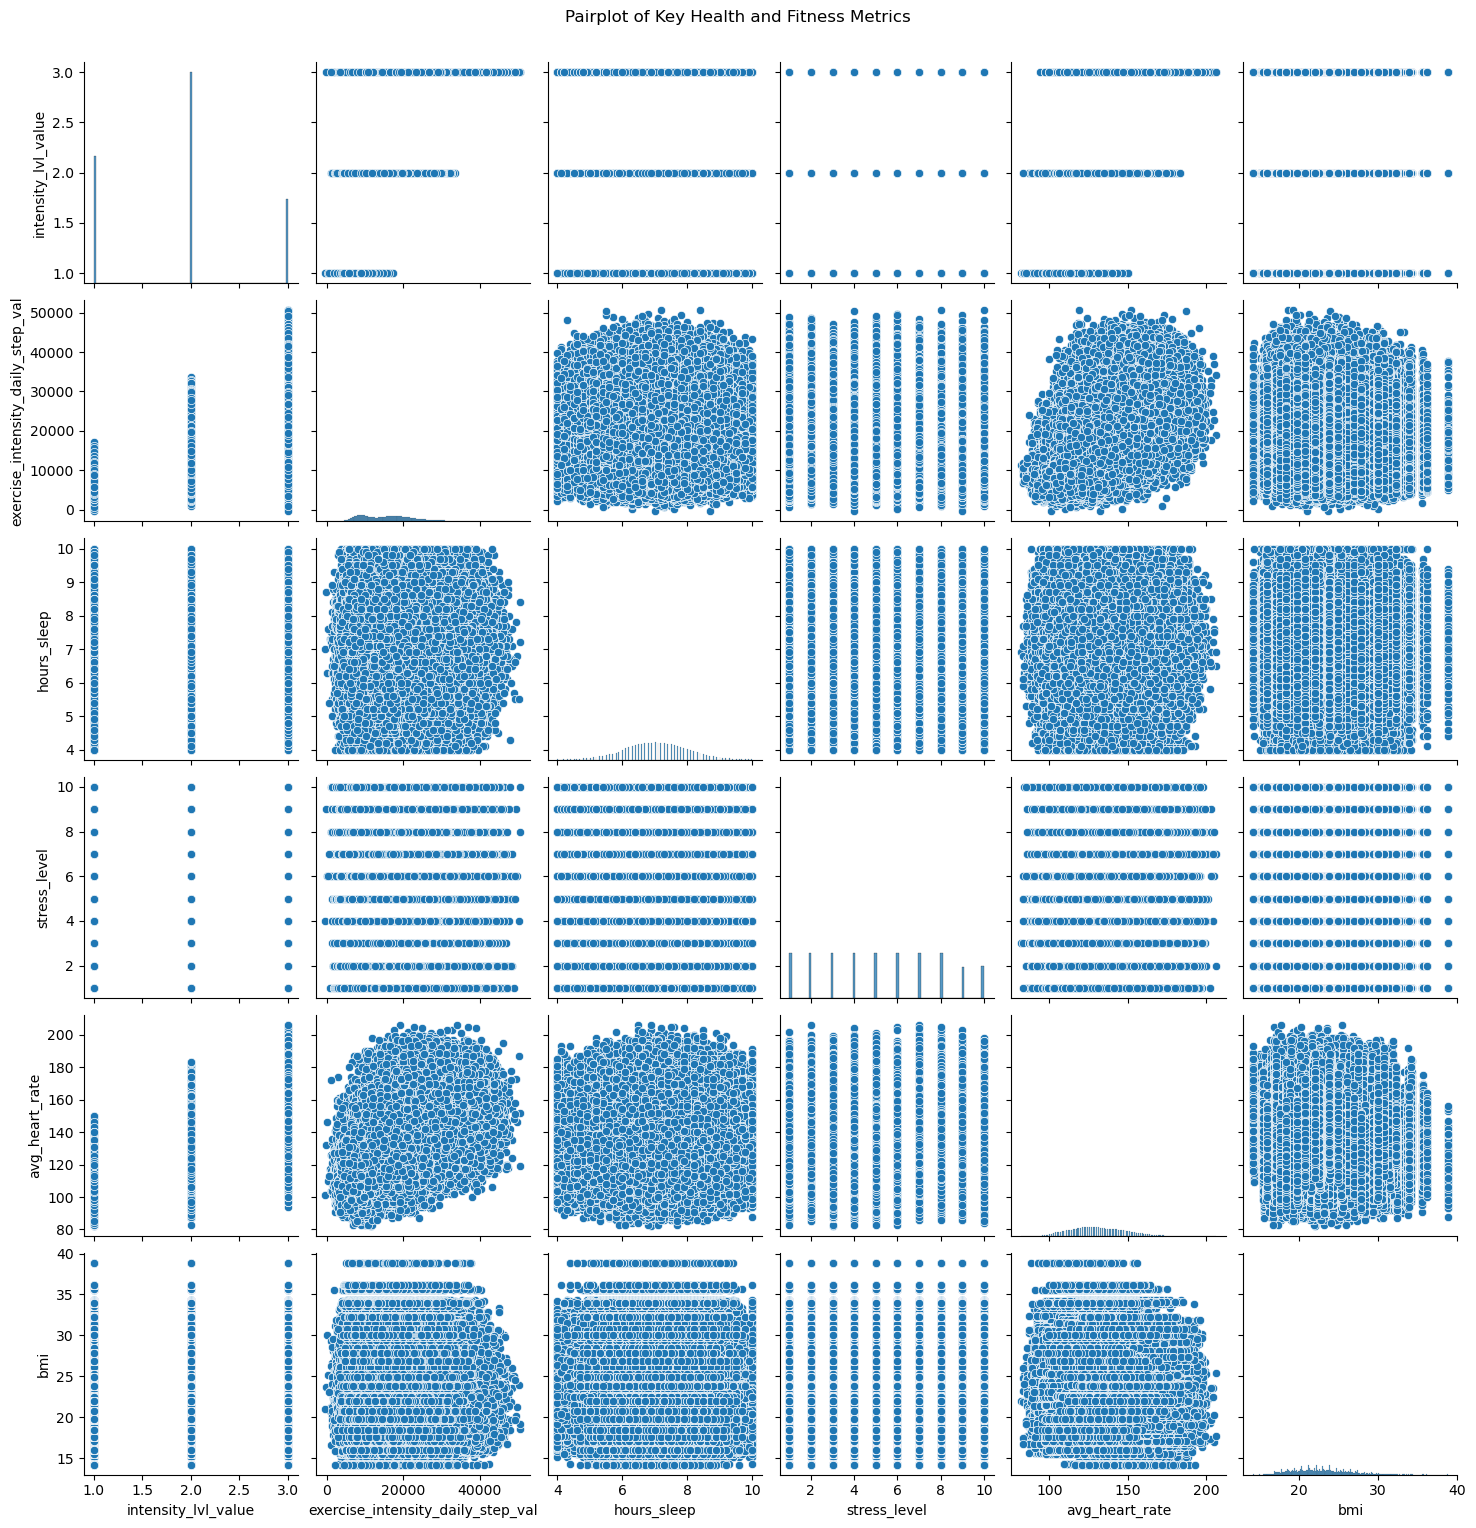

In [58]:
sns.pairplot(hfd_df_original_clean[['intensity_lvl_value', 'exercise_intensity_daily_step_val', 'hours_sleep', 
                         'stress_level', 'avg_heart_rate', 'bmi']])
plt.suptitle('Pairplot of Key Health and Fitness Metrics', y=1.02)
plt.show()

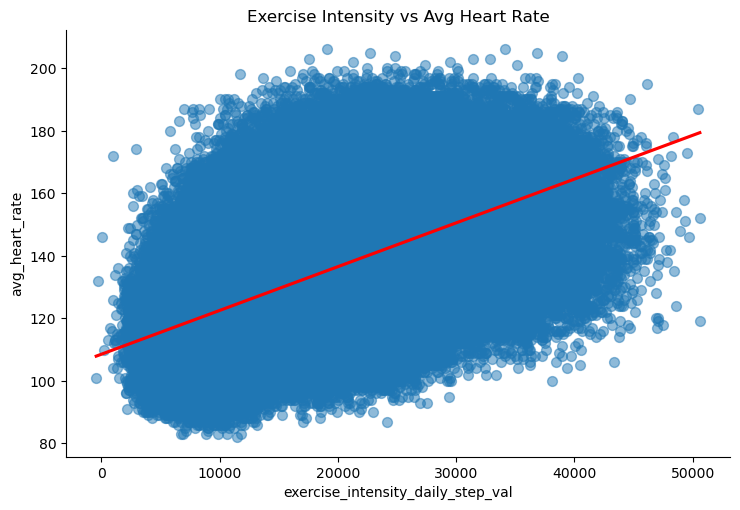

In [59]:
sns.lmplot(x='exercise_intensity_daily_step_val', y='avg_heart_rate', data=hfd_df_original_clean, 
           aspect=1.5, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Exercise Intensity vs Avg Heart Rate')
plt.show()

C:\Users\jcffo\AppData\Local\Temp\ipykernel_16208\2092046493.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fitness_level', y='stress_level', data=hfd_df_original_clean, palette='Set2')


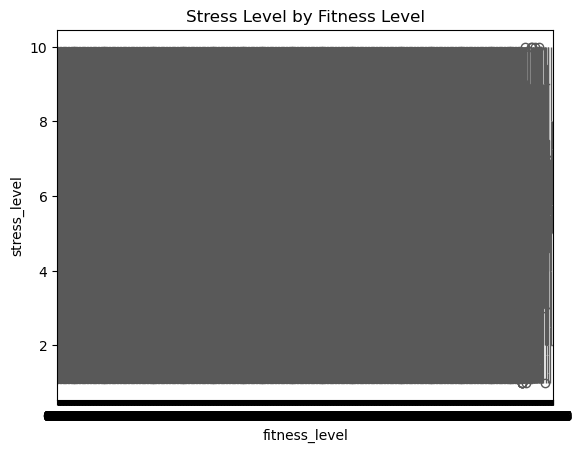

In [60]:
sns.boxplot(x='fitness_level', y='stress_level', data=hfd_df_original_clean, palette='Set2')
plt.title('Stress Level by Fitness Level')
plt.show()

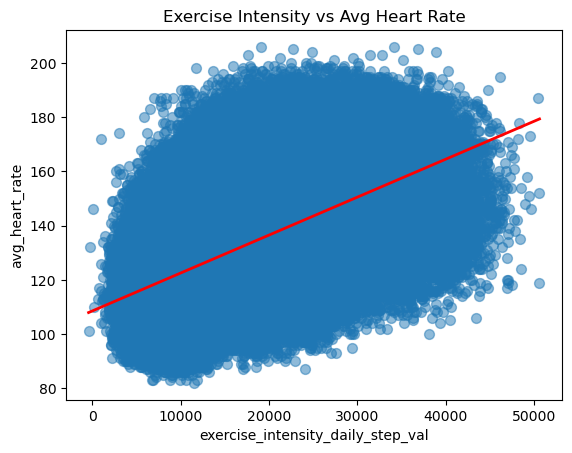

In [61]:
sns.regplot(x='exercise_intensity_daily_step_val', y='avg_heart_rate', data=hfd_df_original_clean, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red', 'lw': 2})
plt.title('Exercise Intensity vs Avg Heart Rate')
plt.show()

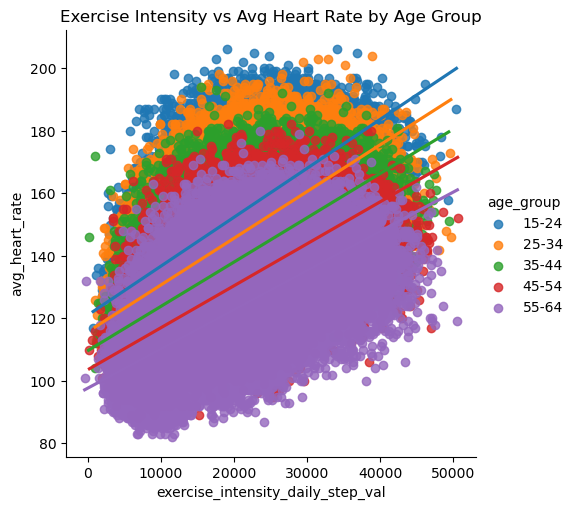

In [62]:
sns.lmplot(x='exercise_intensity_daily_step_val', y='avg_heart_rate', hue='age_group', data=hfd_df_original_clean)
plt.title('Exercise Intensity vs Avg Heart Rate by Age Group')
plt.show()

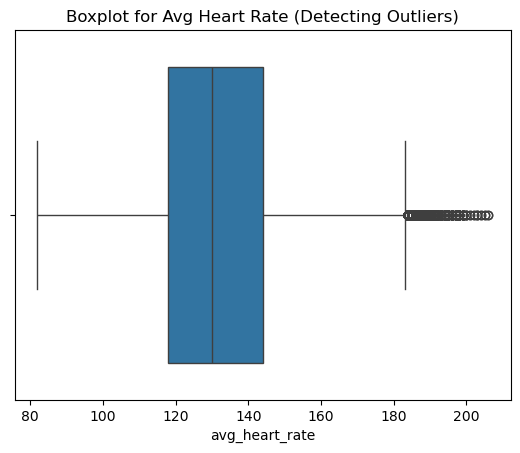

In [63]:
sns.boxplot(x='avg_heart_rate', data=hfd_df_original_clean)
plt.title('Boxplot for Avg Heart Rate (Detecting Outliers)')
plt.show()

In [64]:
hfd_df_original.describe()

date            age  gender      height_cm  \
count                         687701  687701.000000     0.0  687701.000000   
mean   2024-06-16 18:44:21.629981952      41.658602     NaN     168.587699   
min              2024-01-01 00:00:00      18.000000     NaN     145.000000   
25%              2024-03-21 00:00:00      30.000000     NaN     161.700000   
50%              2024-06-06 00:00:00      42.000000     NaN     168.200000   
75%              2024-09-11 00:00:00      53.000000     NaN     175.300000   
max              2024-12-25 00:00:00      64.000000     NaN     198.500000   
std                              NaN      13.581770     NaN       9.140811   

           weight_kg  duration_minutes  calories_burned  avg_heart_rate  \
count  687701.000000     687701.000000    687701.000000   687701.000000   
mean       94.921981         70.011671        15.381302      131.454165   
min        45.300000         20.000000         0.800000       82.000000   
25%        78.200000         45.000000         7.800000      118.000000   
50%        94.600000         70.000000        13.000000      130.000000   
75%       110.500000         95.000000        20.700000      144.000000   
max       188.400000        120.000000        92.000000      206.000000   
std        22.461801         29.147251         9.985552       17.814744   

         hours_sleep   stress_level  ...  fitness_level      year  \
count  687701.000000  687701.000000  ...  687701.000000  687701.0   
mean        7.048799       5.252389  ...       9.524900    2024.0   
min         4.000000       1.000000  ...       0.020000    2024.0   
25%         6.400000       3.000000  ...       4.770000    2024.0   
50%         7.000000       5.000000  ...       9.510000    2024.0   
75%         7.700000       8.000000  ...      14.230000    2024.0   
max        10.000000      10.000000  ...      21.930000    2024.0   
std         0.972068       2.770029  ...       5.502485       0.0   

               month            day     weight_pds      height_in  \
count  687701.000000  687701.000000  687701.000000  687701.000000   
mean        6.038758      15.533793     209.266897      66.373146   
min         1.000000       1.000000      99.869286      57.086645   
25%         3.000000       8.000000     172.401284      63.661452   
50%         6.000000      15.000000     208.557052      66.220508   
75%         9.000000      23.000000     243.610510      69.015785   
max        12.000000      31.000000     415.350408      78.149648   
std         3.373602       8.723428      49.519735       3.598747   

       intensity_lvl_value  activity_type_value  stressful_sleep_val  \
count         687701.00000        687701.000000        687701.000000   
mean               1.89886             5.466648            37.026730   
min                1.00000             1.000000             4.000000   
25%                1.00000             3.000000            20.000000   
50%                2.00000             5.000000            36.000000   
75%                2.00000             8.000000            52.500000   
max                3.00000            10.000000           100.000000   
std                0.70027             2.870317            20.366285   

       exercise_intensity_daily_step_val  
count                      687701.000000  
mean                        16383.580797  
min                          -419.000000  
25%                         10124.000000  
50%                         15918.000000  
75%                         20949.000000  
max                         50592.000000  
std                          7334.689060  

[8 rows x 27 columns]

In [65]:
hfd_df_high_heart_rate = hfd_df_original_clean[hfd_df_original_clean['avg_heart_rate'] > 150]

hfd_df_high_heart_rate.describe()

date            age  gender      height_cm  \
count                         104098  104098.000000     0.0  104098.000000   
mean   2024-06-16 23:23:01.444408064      30.113105     NaN     168.486295   
min              2024-01-01 00:00:00      18.000000     NaN     145.000000   
25%              2024-03-22 00:00:00      22.000000     NaN     161.700000   
50%              2024-06-06 00:00:00      28.000000     NaN     167.900000   
75%              2024-09-11 00:00:00      36.000000     NaN     175.000000   
max              2024-12-25 00:00:00      64.000000     NaN     198.500000   
std                              NaN      10.025118     NaN       9.184742   

           weight_kg  duration_minutes  calories_burned  avg_heart_rate  \
count  104098.000000     104098.000000    104098.000000   104098.000000   
mean       94.287391         69.911814        17.246310      160.791667   
min        45.300000         20.000000         1.100000      151.000000   
25%        77.600000         45.000000         8.800000      154.000000   
50%        93.900000         70.000000        14.700000      159.000000   
75%       109.700000         95.000000        23.300000      166.000000   
max       181.600000        120.000000        92.000000      206.000000   
std        22.357313         29.128966        11.040536        8.559759   

         hours_sleep   stress_level  ...  fitness_level      year  \
count  104098.000000  104098.000000  ...  104098.000000  104098.0   
mean        7.049196       5.250408  ...       9.527101    2024.0   
min         4.000000       1.000000  ...       0.030000    2024.0   
25%         6.400000       3.000000  ...       4.790000    2024.0   
50%         7.000000       5.000000  ...       9.490000    2024.0   
75%         7.700000       8.000000  ...      14.230000    2024.0   
max        10.000000      10.000000  ...      21.630000    2024.0   
std         0.971019       2.776460  ...       5.491416       0.0   

               month            day     weight_pds      height_in  \
count  104098.000000  104098.000000  104098.000000  104098.000000   
mean        6.044669      15.548474     207.867867      66.333223   
min         1.000000       1.000000      99.869286      57.086645   
25%         3.000000       8.000000     171.078512      63.661452   
50%         6.000000      15.000000     207.013818      66.102398   
75%         9.000000      23.000000     241.846814      68.897675   
max        12.000000      31.000000     400.358992      78.149648   
std         3.372313       8.715245      49.289380       3.616042   

       intensity_lvl_value  activity_type_value  stressful_sleep_val  \
count        104098.000000        104098.000000        104098.000000   
mean              2.675959             5.464889            37.013169   
min               2.000000             1.000000             4.000000   
25%               2.000000             3.000000            19.800000   
50%               3.000000             5.000000            36.000000   
75%               3.000000             8.000000            52.800000   
max               3.000000            10.000000           100.000000   
std               0.468018             2.873538            20.393306   

       exercise_intensity_daily_step_val  
count                      104098.000000  
mean                        23074.122673  
min                          1035.000000  
25%                         17895.000000  
50%                         22641.000000  
75%                         27939.000000  
max                         50592.000000  
std                          6886.386049  

[8 rows x 27 columns]

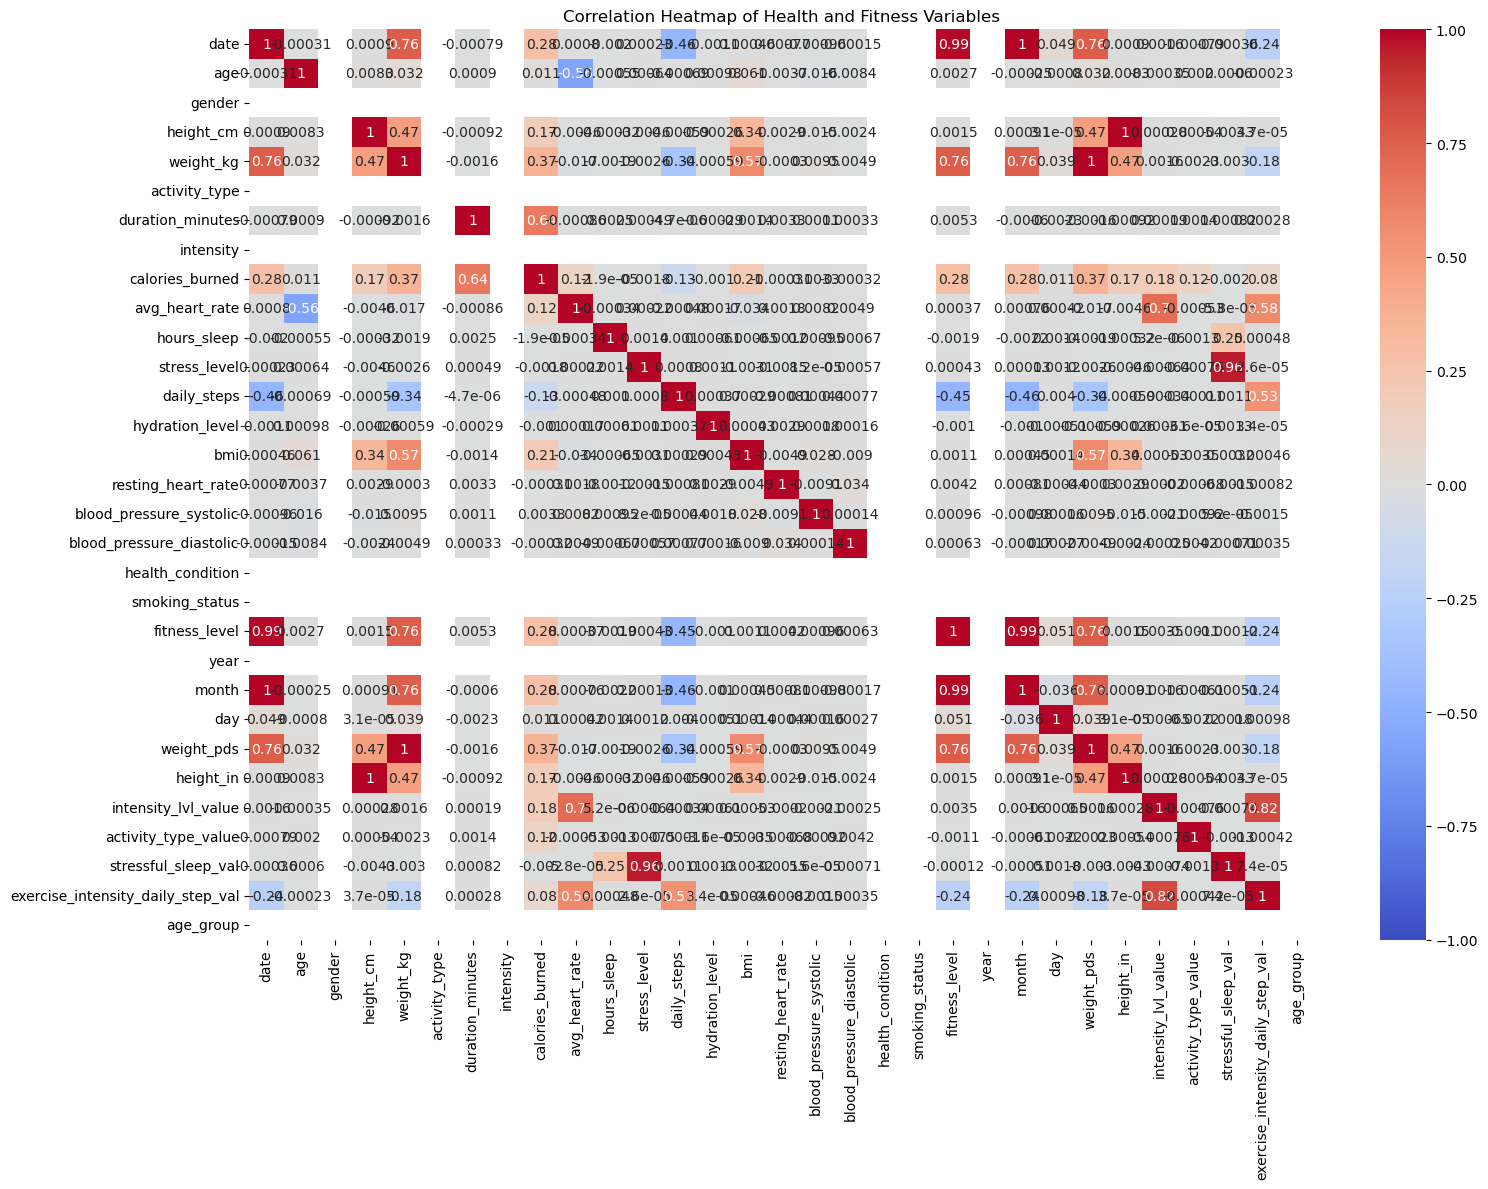

In [66]:
hfd_df_rate = hfd_df_original_clean.apply(pd.to_numeric, errors='coerce')
hfd_df_rate_clean = hfd_df_rate.dropna(axis=1, how='all')
numeric_df = hfd_df_rate.select_dtypes(include=['number'])

corr_matrix_hi_bp = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix_hi_bp, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Health and Fitness Variables')
plt.tight_layout()
plt.show()

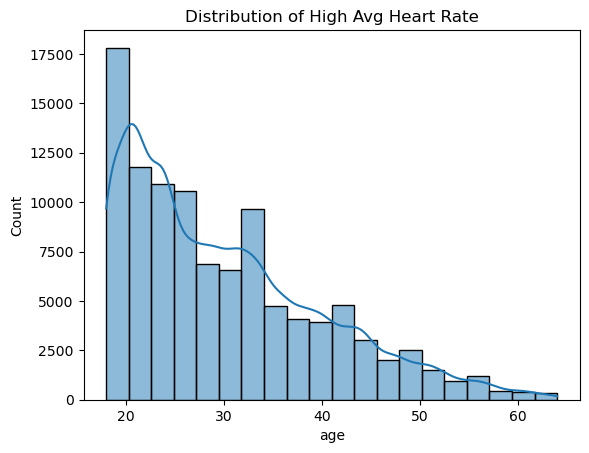

In [67]:
sns.histplot(hfd_df_high_heart_rate['age'], bins=20, kde=True)
plt.title('Distribution of High Avg Heart Rate')
plt.show()

In [68]:
hfd_df_high_heart_rate_systo = hfd_df_original_clean[hfd_df_original_clean['blood_pressure_systolic'] > 126]
hfd_df_low_heart_rate_systo = hfd_df_original_clean[hfd_df_original_clean['blood_pressure_systolic'] < 113]

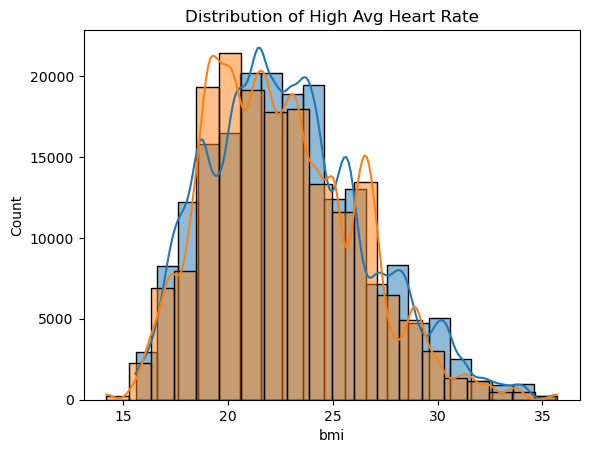

In [69]:
sns.histplot(hfd_df_high_heart_rate_systo['bmi'], bins=20, kde=True)
sns.histplot(hfd_df_low_heart_rate_systo['bmi'], bins=20, kde=True)
plt.title('Distribution of High Avg Heart Rate')
plt.show()

In [70]:
hfd_df_high_weight = hfd_df_original_clean[hfd_df_original_clean['weight_pds'] > 241]
hfd_df_low_weight = hfd_df_original_clean[hfd_df_original_clean['weight_pds'] < 171]

hfd_df_high_avg_hr = hfd_df_original_clean[hfd_df_original_clean['avg_heart_rate'] > 166]
hfd_df_low_avg_hr = hfd_df_original_clean[hfd_df_original_clean['avg_heart_rate'] < 154]

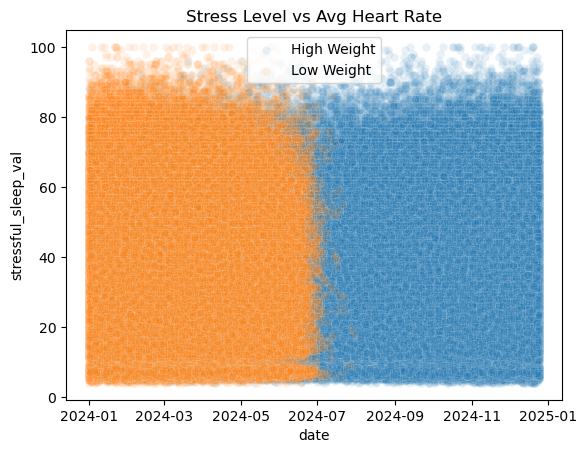

In [71]:
sns.scatterplot(x=hfd_df_high_weight['date'], y=hfd_df_high_weight['stressful_sleep_val'], alpha=0.1)
sns.scatterplot(x=hfd_df_low_weight['date'], y=hfd_df_low_weight['stressful_sleep_val'], alpha=0.1)
plt.title('Stressful Sleep vs Weight')
plt.title('Stress Level vs Avg Heart Rate')
plt.legend(['High Weight', 'Low Weight'])
plt.show()

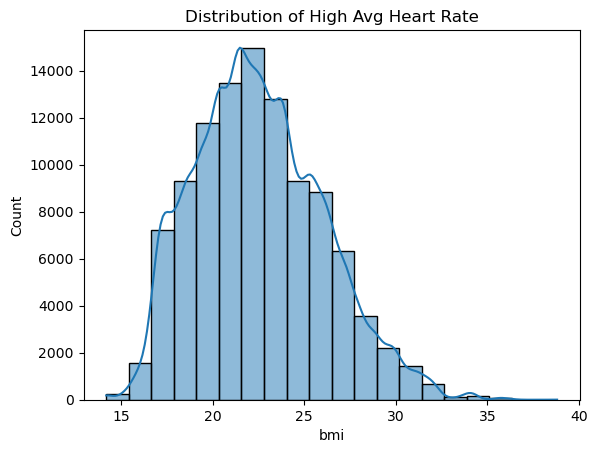

In [72]:
sns.histplot(hfd_df_high_heart_rate['bmi'], bins=20, kde=True)
plt.title('Distribution of High Avg Heart Rate')
plt.show()

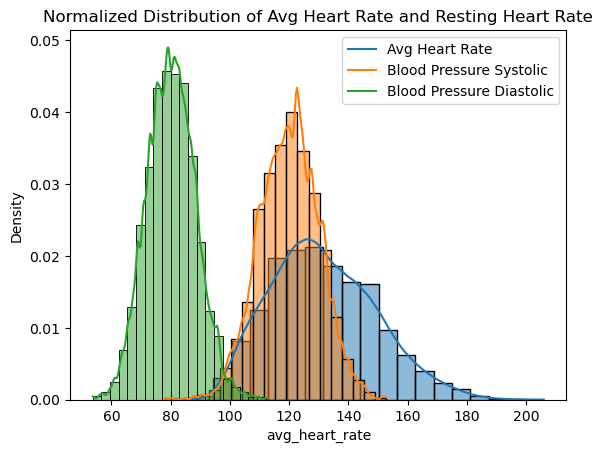

In [73]:
sns.histplot(hfd_df_original_clean['avg_heart_rate'], bins=20, kde=True, stat='density')
sns.histplot(hfd_df_original_clean['blood_pressure_systolic'], bins=20, kde=True, stat='density')
sns.histplot(hfd_df_original_clean['blood_pressure_diastolic'], bins=20, kde=True, stat='density')

plt.title('Normalized Distribution of Avg Heart Rate and Resting Heart Rate')
plt.legend(['Avg Heart Rate', 'Blood Pressure Systolic', 'Blood Pressure Diastolic'])
plt.show()

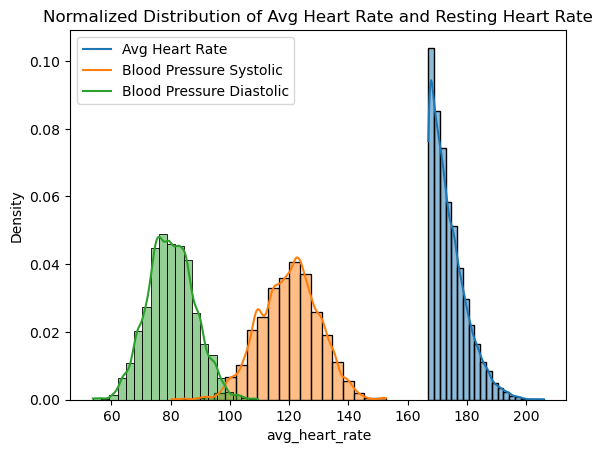

In [74]:
sns.histplot(hfd_df_high_avg_hr['avg_heart_rate'], bins=20, kde=True, stat='density')
sns.histplot(hfd_df_high_avg_hr['blood_pressure_systolic'], bins=20, kde=True, stat='density')
sns.histplot(hfd_df_high_avg_hr['blood_pressure_diastolic'], bins=20, kde=True, stat='density')

plt.title('Normalized Distribution of Avg Heart Rate and Resting Heart Rate')
plt.legend(['Avg Heart Rate', 'Blood Pressure Systolic', 'Blood Pressure Diastolic'])
plt.show()

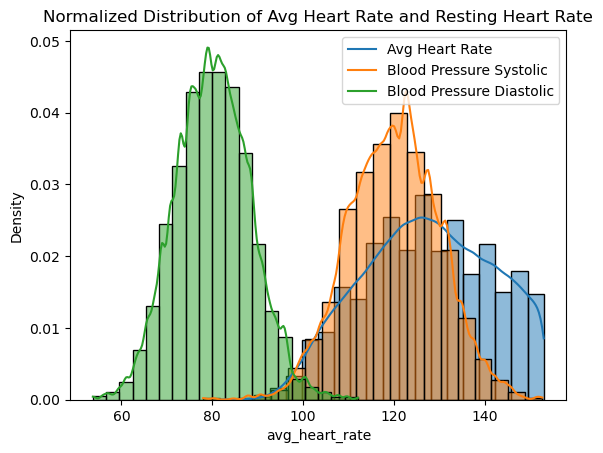

In [75]:
sns.histplot(hfd_df_low_avg_hr['avg_heart_rate'], bins=20, kde=True, stat='density')
sns.histplot(hfd_df_low_avg_hr['blood_pressure_systolic'], bins=20, kde=True, stat='density')
sns.histplot(hfd_df_low_avg_hr['blood_pressure_diastolic'], bins=20, kde=True, stat='density')

plt.title('Normalized Distribution of Avg Heart Rate and Resting Heart Rate')
plt.legend(['Avg Heart Rate', 'Blood Pressure Systolic', 'Blood Pressure Diastolic'])
plt.show()

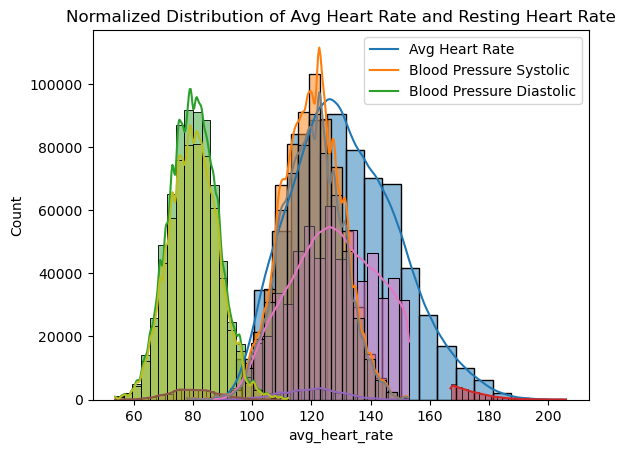

In [76]:
sns.histplot(hfd_df_original_clean['avg_heart_rate'], bins=20, kde=True)
sns.histplot(hfd_df_original_clean['blood_pressure_systolic'], bins=20, kde=True)
sns.histplot(hfd_df_original_clean['blood_pressure_diastolic'], bins=20, kde=True)
sns.histplot(hfd_df_high_avg_hr['avg_heart_rate'], bins=20, kde=True)
sns.histplot(hfd_df_high_avg_hr['blood_pressure_systolic'], bins=20, kde=True)
sns.histplot(hfd_df_high_avg_hr['blood_pressure_diastolic'], bins=20, kde=True)
sns.histplot(hfd_df_low_avg_hr['avg_heart_rate'], bins=20, kde=True)
sns.histplot(hfd_df_low_avg_hr['blood_pressure_systolic'], bins=20, kde=True)
sns.histplot(hfd_df_low_avg_hr['blood_pressure_diastolic'], bins=20, kde=True)

plt.title('Normalized Distribution of Avg Heart Rate and Resting Heart Rate')
plt.legend(['Avg Heart Rate', 'Blood Pressure Systolic', 'Blood Pressure Diastolic'])
plt.show()

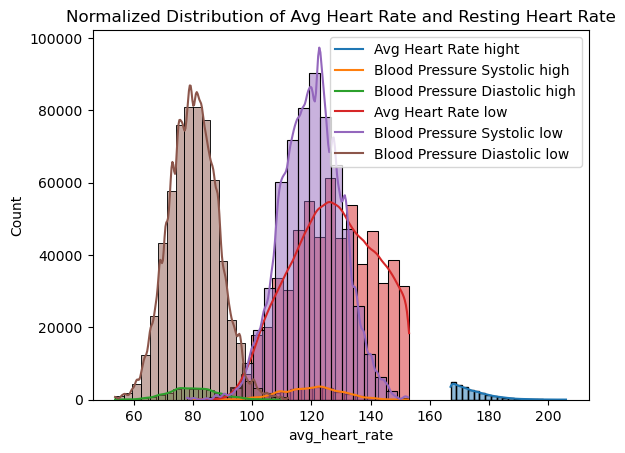

In [77]:
sns.histplot(hfd_df_high_avg_hr['avg_heart_rate'], bins=20, kde=True)
sns.histplot(hfd_df_high_avg_hr['blood_pressure_systolic'], bins=20, kde=True)
sns.histplot(hfd_df_high_avg_hr['blood_pressure_diastolic'], bins=20, kde=True)
sns.histplot(hfd_df_low_avg_hr['avg_heart_rate'], bins=20, kde=True)
sns.histplot(hfd_df_low_avg_hr['blood_pressure_systolic'], bins=20, kde=True)
sns.histplot(hfd_df_low_avg_hr['blood_pressure_diastolic'], bins=20, kde=True)

plt.title('Normalized Distribution of Avg Heart Rate and Resting Heart Rate')
plt.legend(['Avg Heart Rate hight', 'Blood Pressure Systolic high', 'Blood Pressure Diastolic high', 'Avg Heart Rate low', 'Blood Pressure Systolic low', 'Blood Pressure Diastolic low'])  
plt.show()

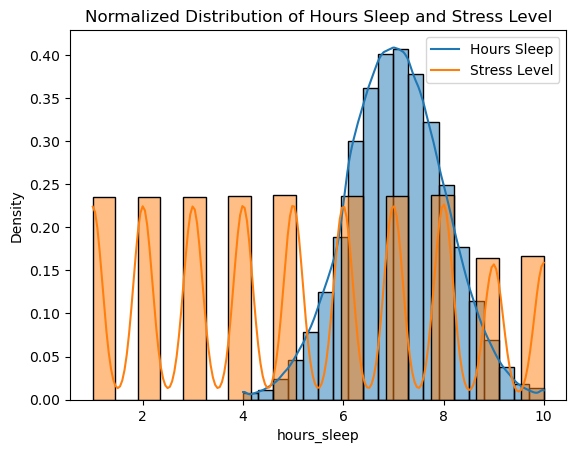

In [78]:
sns.histplot(hfd_df_original_clean['hours_sleep'], bins=20, kde=True, stat='density')
sns.histplot(hfd_df_original_clean['stress_level'], bins=20, kde=True, stat='density')

plt.title('Normalized Distribution of Hours Sleep and Stress Level')
plt.legend(['Hours Sleep', 'Stress Level'])
plt.show()

C:\Users\jcffo\AppData\Local\Temp\ipykernel_16208\2826923848.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='avg_heart_rate', data=hfd_df_original_clean, ci=None, marker='o', ax=ax2, color='red', label='Avg Heart Rate')


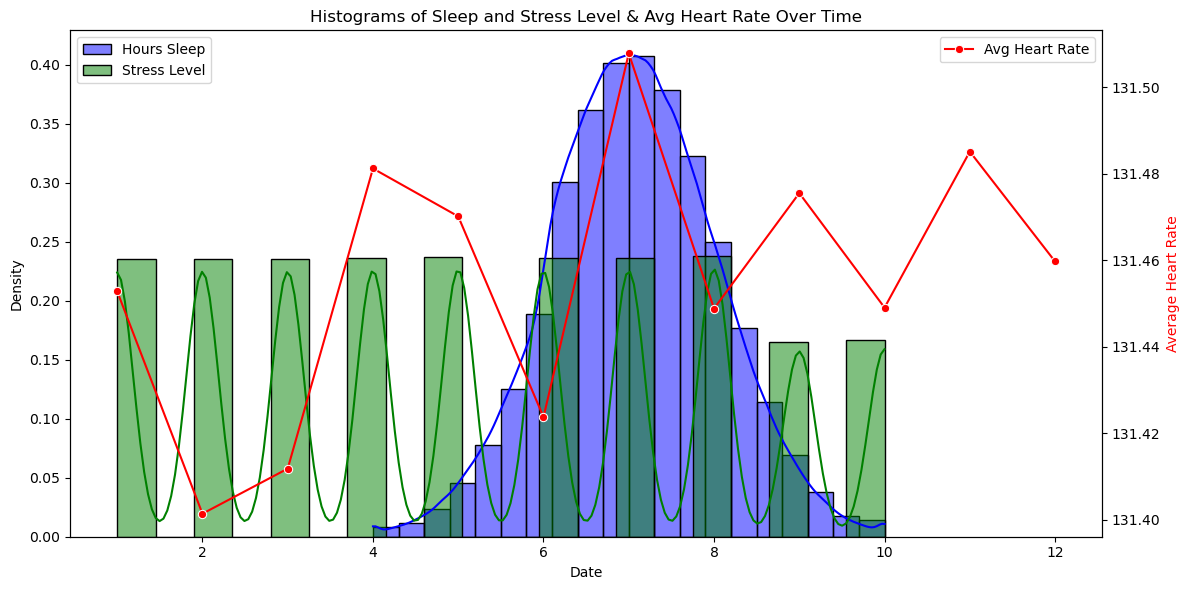

In [79]:
ig, ax1 = plt.subplots(figsize=(12, 6))

sns.histplot(hfd_df_original_clean['hours_sleep'], bins=20, kde=True, stat='density', color='blue', ax=ax1, label='Hours Sleep')
sns.histplot(hfd_df_original_clean['stress_level'], bins=20, kde=True, stat='density', color='green', ax=ax1, label='Stress Level')

ax2 = ax1.twinx()

sns.lineplot(x='month', y='avg_heart_rate', data=hfd_df_original_clean, ci=None, marker='o', ax=ax2, color='red', label='Avg Heart Rate')

ax1.set_title('Histograms of Sleep and Stress Level & Avg Heart Rate Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Density', color='black')
ax2.set_ylabel('Average Heart Rate', color='red')

plt.xticks(rotation=45)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [80]:
# monthly_data = hfd_df_original_clean.groupby('month')[['hours_sleep', 'daily_steps', 'avg_heart_rate', 'bmi', 'stress_level']].mean().reset_index()


In [81]:
# monthly_data['total_duration'] = hfd_df_original_clean.groupby('month')['duration_minutes'].sum().reset_index()['duration_minutes']
# monthly_data['avg_intensity'] = hfd_df_original_clean.groupby('month')['intensity_lvl_value'].mean().reset_index()['intensity_lvl_value']

jan_data = hfd_df_original_clean[hfd_df_original_clean['month'] == 1]
jan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62124 entries, 1 to 3000
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   date                               62124 non-null  datetime64[ns]
 1   age                                62124 non-null  int64         
 2   gender                             0 non-null      float64       
 3   height_cm                          62124 non-null  float64       
 4   weight_kg                          62124 non-null  float64       
 5   activity_type                      62124 non-null  object        
 6   duration_minutes                   62124 non-null  int64         
 7   intensity                          62124 non-null  object        
 8   calories_burned                    62124 non-null  float64       
 9   avg_heart_rate                     62124 non-null  int64         
 10  hours_sleep                        62124

C:\Users\jcffo\AppData\Local\Temp\ipykernel_16208\499065653.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='day', y='avg_heart_rate', data=jan_data, ci=None, marker='o', ax=ax2, color='red', label='Avg Heart Rate')
C:\Users\jcffo\AppData\Local\Temp\ipykernel_16208\499065653.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='day', y='stress_level', data=jan_data, ci=None, marker='o', ax=ax2, color='green', label='Stress Level')
C:\Users\jcffo\AppData\Local\Temp\ipykernel_16208\499065653.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='day', y='hours_sleep', data=jan_data, ci=None, marker='o', ax=ax2, color='blue', label='Hours Sleep')


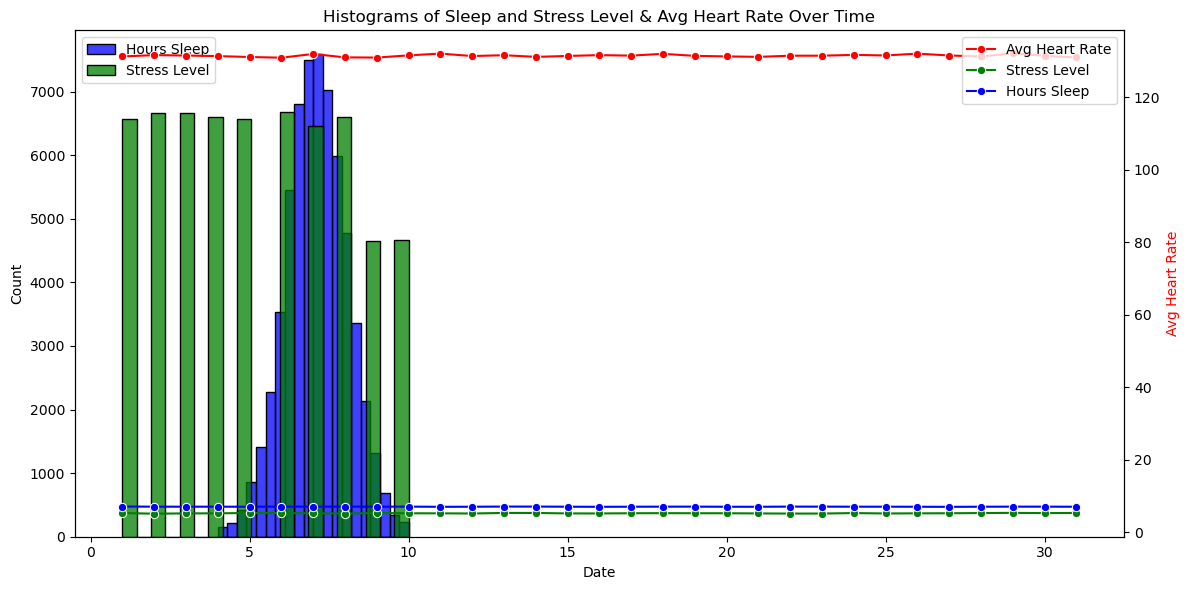

In [82]:

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.histplot(jan_data['hours_sleep'], bins=20, color='blue', ax=ax1, label='Hours Sleep')
sns.histplot(jan_data['stress_level'], bins=20, color='green', ax=ax1, label='Stress Level')

ax2 = ax1.twinx()

sns.lineplot(x='day', y='avg_heart_rate', data=jan_data, ci=None, marker='o', ax=ax2, color='red', label='Avg Heart Rate')
sns.lineplot(x='day', y='stress_level', data=jan_data, ci=None, marker='o', ax=ax2, color='green', label='Stress Level')
sns.lineplot(x='day', y='hours_sleep', data=jan_data, ci=None, marker='o', ax=ax2, color='blue', label='Hours Sleep')


ax1.set_title('Histograms of Sleep and Stress Level & Avg Heart Rate Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Count', color='black') 
ax2.set_ylabel('Avg Heart Rate', color='red')

plt.xticks(rotation=45)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


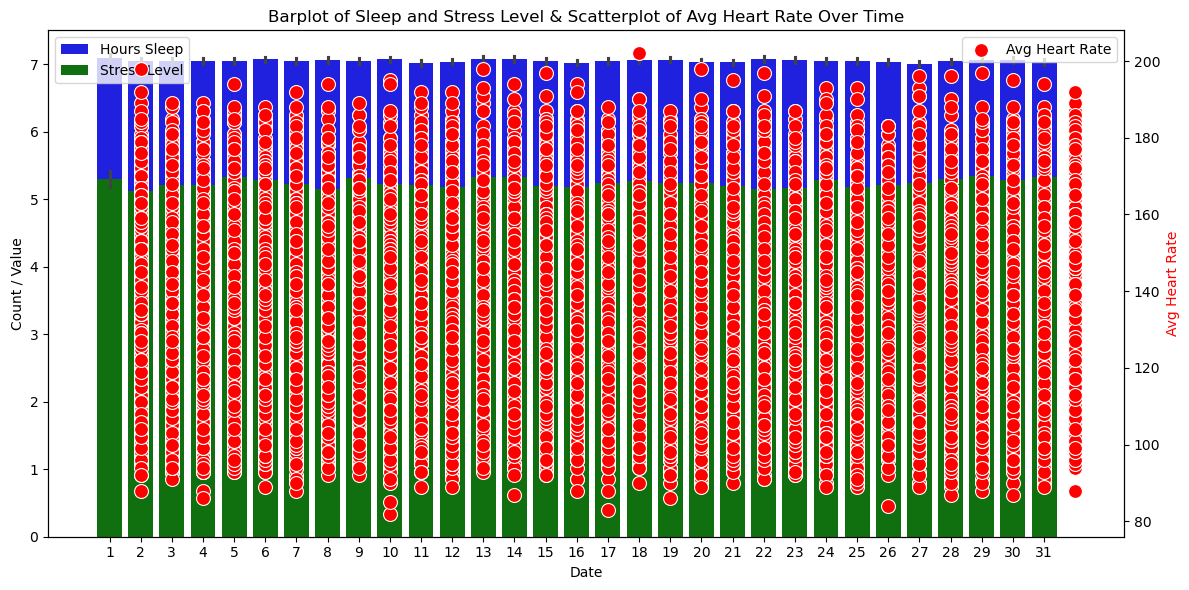

In [83]:
fig, ax1 = plt.subplots(figsize=(12, 6))


sns.barplot(x='day', y='hours_sleep', data=jan_data, ax=ax1, color='blue', label='Hours Sleep')
sns.barplot(x='day', y='stress_level', data=jan_data, ax=ax1, color='green', label='Stress Level')

ax2 = ax1.twinx()

sns.scatterplot(x='day', y='avg_heart_rate', data=jan_data, ax=ax2, color='red', label='Avg Heart Rate', s=100)

ax1.set_title('Barplot of Sleep and Stress Level & Scatterplot of Avg Heart Rate Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Count / Value', color='black') 
ax2.set_ylabel('Avg Heart Rate', color='red')

plt.xticks(rotation=45)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


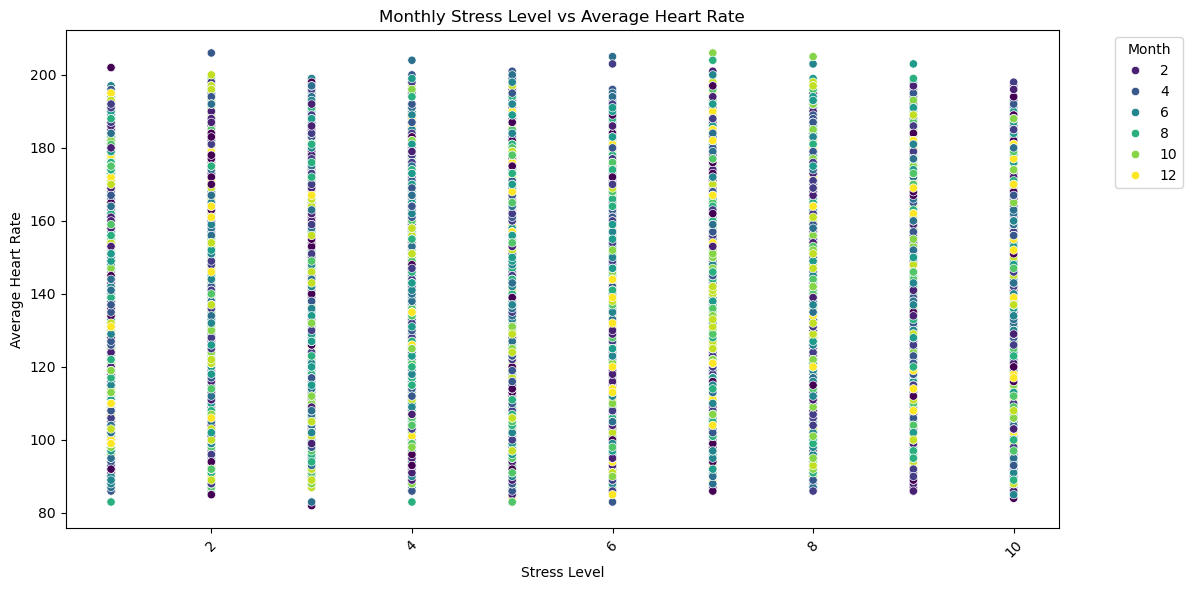

In [87]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='stress_level', y='avg_heart_rate', data=hfd_df_original_clean, hue='month', palette='viridis')

# Customize the plot
plt.title('Monthly Stress Level vs Average Heart Rate')
plt.xlabel('Stress Level')
plt.ylabel('Average Heart Rate')
plt.xticks(rotation=45)
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


In [88]:
# Calculate the correlation matrix
corr_matrix = monthly_data[['hours_sleep', 'daily_steps', 'avg_heart_rate', 'bmi', 'stress_level']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

# Customize the plot
plt.title('Correlation Matrix of Monthly Variables')
plt.tight_layout()
plt.show()


NameError: name 'monthly_data' is not defined

In [ ]:
print(hfd_df_original_clean[['avg_heart_rate', 'bmi', 'stress_level']].describe())

In [ ]:
columns_to_check = ['avg_heart_rate', 'bmi', 'stress_level', 'calories_burned', 'daily_steps', 'hours_sleep',]

# Create a plot for each
fig, axes = plt.subplots(3, 2, figsize=(8, 8))

for i, column in enumerate(columns_to_check):
    ax = axes[i // 2, i % 2]
    sns.boxplot(ax=ax, x=hfd_df_original_clean[column], color='purple')
    ax.set_title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

In [ ]:
columns_to_check = ['blood_pressure_systolic', 'blood_pressure_diastolic', 'weight_pds', 'height_in', 'resting_heart_rate',  'fitness_level']

# Create a plot for each
fig, axes = plt.subplots(3, 2, figsize=(8, 8))

for i, column in enumerate(columns_to_check):
    ax = axes[i // 2, i % 2]
    sns.boxplot(ax=ax, x=hfd_df_original_clean[column], color='purple')
    ax.set_title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

In [ ]:
plot_grouped_metrics_scatter(hfd_df_original_clean, metrics=['avg_heart_rate', 'fitness_level', 'stress_level'], 
                     x_column='daily_steps', group_by_column='daily_steps')

In [ ]:
# create histograms for hours_sleep, daily_steps, and avg_heart_rate
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

sns.histplot(hfd_df_original_clean['hours_sleep'], kde=True, color='blue', ax=axes[0])
axes[0].set_title("Hours of Sleep Distribution", fontsize=14, weight='bold')

sns.histplot(hfd_df_original_clean['bmi'], kde=True, color='green', ax=axes[1])
axes[1].set_title("BMI Distribution", fontsize=14, weight='bold')

sns.histplot(hfd_df_original_clean['avg_heart_rate'], kde=True, color='red', ax=axes[2])
axes[2].set_title("Average Heart Rate Distribution", fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# create histograms for exercise intensity, daily activity, sleep hours, stress level

fig, axes = plt.subplots(1, 4, figsize=(10, 5))

sns.histplot(hfd_df_original_clean['intensity_lvl_value'], kde=True, color='blue', ax=axes[0])
axes[0].set_title("Workout intensity Distribution", fontsize=8, weight='bold')

sns.histplot(hfd_df_original_clean['duration_minutes'], kde=True, color='green', ax=axes[1])
axes[1].set_title("Workout duration Distribution", fontsize=8, weight='bold')

sns.histplot(hfd_df_original_clean['hours_sleep'], kde=True, color='red', ax=axes[2])
axes[2].set_title("Hours of Sleep Distribution", fontsize=8, weight='bold')

sns.histplot(hfd_df_original_clean['stress_level'], kde=True, color='red', ax=axes[3])
axes[3].set_title("Stress level Distribution", fontsize=8, weight='bold')

plt.tight_layout()
plt.show()

In [ ]:
plot_grouped_metrics_barplot(hfd_df_original_clean, metrics=['avg_heart_rate', 'fitness_level', 'stress_level'], 
                     x_column='age_group', group_by_column='age_group')

plot_grouped_metrics_boxplot(hfd_df_original_clean, metrics=['avg_heart_rate', 'fitness_level', 'stress_level'],
                             x_column='age_group', group_by_column='age_group')

In [ ]:
age_counts = hfd_df_original_clean['age'].value_counts().sort_index() 

plt.figure(figsize=(10, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, palette='viridis')

plt.title('Age Distribution by Count')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.tight_layout()

plt.show()



In [ ]:
age_participant_counts = hfd_df_original.groupby('age').apply(lambda x: x.index.nunique())

plt.figure(figsize=(12, 6))

ax = sns.barplot(x=age_participant_counts.index, y=age_participant_counts.values, color='skyblue')

plt.title('Unique Participant Count per Age')
plt.xlabel('Age')
plt.ylabel('Unique Participant Count')

plt.xticks(rotation=45)
for i, count in enumerate(age_participant_counts.values):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()




In [ ]:
plot_grouped_metrics_scatter(hfd_df_original_clean, metrics=['avg_heart_rate', 'fitness_level', 'stress_level'], 
                     x_column='daily_steps', group_by_column='daily_steps')

In [ ]:
hfd_df_h_step_l_fl = hfd_df_original[(hfd_df_original['daily_steps'] > 12500) & (hfd_df_original['fitness_level'] < 10)]
hfd_df_h_step_l_fl.head()


In [ ]:
hfd_df_h_step_l_fl = hfd_df_original_clean[(hfd_df_original_clean['daily_steps'] > 12500) & (hfd_df_original_clean['fitness_level'] < 10)]
hfd_df_h_step_l_fl.head()

In [ ]:
hfd_df_h_step_l_fl.info()

In [ ]:
plot_grouped_metrics_scatter(hfd_df_h_step_l_fl, metrics=['avg_heart_rate', 'fitness_level', 'stress_level'], 
                     x_column='daily_steps', group_by_column='daily_steps')

In [ ]:
sns.histplot(hfd_df_h_step_l_fl['duration_minutes'], bins=20, kde=True)

In [ ]:
def categorize_activity_level(steps):
    if steps < 5000:
        return 'Low'
    elif 5000 <= steps <= 10000:
        return 'Moderate'
    else:
        return 'High'

hfd_df_original_clean['activity_level'] = hfd_df_original_clean['daily_steps'].apply(categorize_activity_level)

fitness_by_activity_level = hfd_df_original_clean.groupby('activity_level')['fitness_level'].mean()
print(fitness_by_activity_level)

In [ ]:
sns.barplot(x=fitness_by_activity_level.index, y=fitness_by_activity_level.values, palette='viridis')

plt.title('Fitness Level by Activity Level')
plt.xlabel('Activity Level')
plt.ylabel('Fitness Level')
plt.tight_layout()
plt.show()

In [ ]:
hfd_df_h_step_l_fl = hfd_df_original[(hfd_df_original['daily_steps'] > 12500) & (hfd_df_original['fitness_level'] < 10)]
hfd_df_h_step_l_fl.head()

date  age  gender  height_cm  weight_kg    activity_type  \
participant_id                                                                  
1              2024-02-10   56     NaN      165.3       60.1           Tennis   
1              2024-02-18   56     NaN      165.3       61.4  Weight Training   
1              2024-03-03   56     NaN      165.3       64.8       Basketball   
1              2024-03-09   56     NaN      165.3       65.5       Basketball   
1              2024-03-11   56     NaN      165.3       66.1  Weight Training   

                duration_minutes intensity  calories_burned  avg_heart_rate  \
participant_id                                                                
1                             41    Medium              6.0             123   
1                             31    Medium              3.8             118   
1                             40       Low              5.7             107   
1                             24    Medium              4.2             122   
1                             23    Medium              3.0             114   

                ...  year  month  day  weight_pds  height_in  \
participant_id  ...                                            
1               ...  2024      2   10  132.497662  65.078775   
1               ...  2024      2   18  135.363668  65.078775   
1               ...  2024      3    3  142.859376  65.078775   
1               ...  2024      3    9  144.402610  65.078775   
1               ...  2024      3   11  145.725382  65.078775   

                intensity_lvl_value  activity_type_value  stressful_sleep_val  \
participant_id                                                                  
1                                 2                    7                 39.5   
1                                 2                    2                 15.3   
1                                 1                    6                  6.4   
1                                 2                    6                 20.0   
1                                 2                    2                 23.1   

               exercise_intensity_daily_step_val  age_group  
participant_id                                               
1                                          25438      55-64  
1                                          25856      55-64  
1                                          13435      55-64  
1                                          25334      55-64  
1                                          26014      55-64  

[5 rows x 31 columns]

In [ ]:
min_raw_score = 0  
max_raw_score = 100 
hfd_df_original_clean['raw_fitness_level'] = hfd_df_original_clean['fitness_level'].apply(
    convert_scaled_to_raw, args=(min_raw_score, max_raw_score)
)

hfd_df_original_clean[['fitness_level', 'raw_fitness_level']].head()

fitness_level  raw_fitness_level
participant_id                                  
1                        0.04                0.4
1                        0.07                0.7
1                        0.09                0.9
1                        0.21                2.1
1                        0.33                3.3

C:\Users\jcffo\AppData\Local\Temp\ipykernel_16208\2652600929.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='stress_level', data=participant_1, ci=None, marker='o', ax=ax, color='green', label='Stress Level')
C:\Users\jcffo\AppData\Local\Temp\ipykernel_16208\2652600929.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='hours_sleep', data=participant_1, ci=None, marker='o', ax=ax, color='blue', label='Hours Sleep')
C:\Users\jcffo\AppData\Local\Temp\ipykernel_16208\2652600929.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='fitness_level', data=participant_1, ci=None, marker='o', ax=ax, color='orange', label='Fitness Level')
C:\Users\jcffo\AppData\Local\Temp\ipykernel_16208\2652600929.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorb

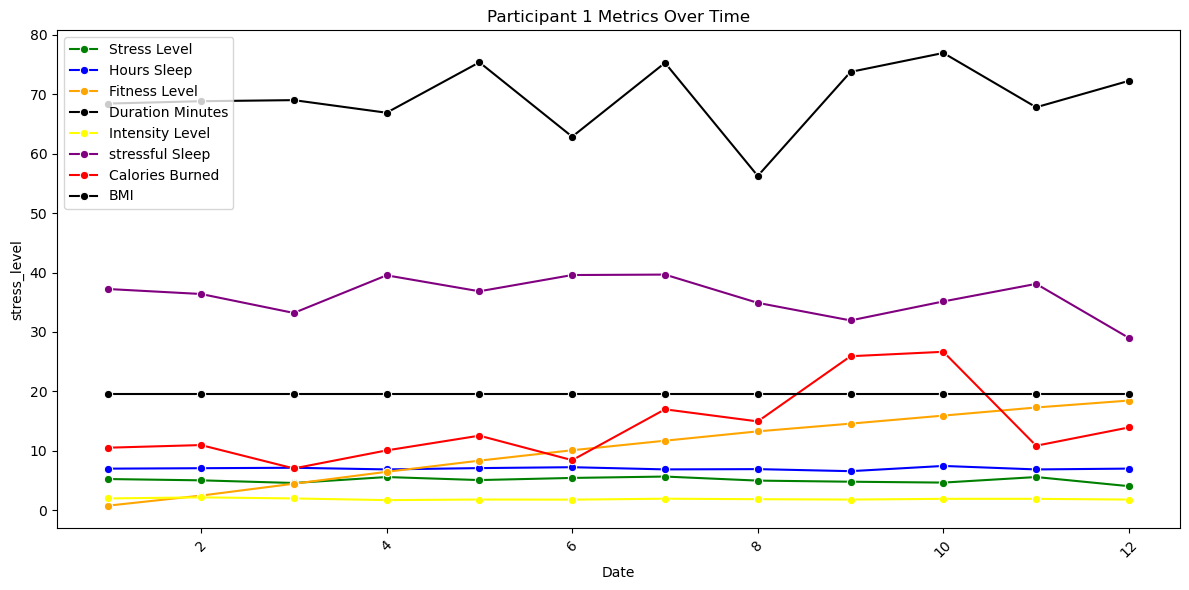

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

#sns.histplot(participant_1['hours_sleep'], bins=20, color='blue', ax=ax1, label='Hours Sleep')
#sns.histplot(participant_1['stress_level'], bins=20, color='green', ax=ax1, label='Stress Level')
#sns.histplot(participant_1['daily_steps'], bins=20, color='purple', ax=ax1, label='Daily Steps')
#sns.histplot(participant_1['avg_heart_rate'], bins=20, color='red', ax=ax1, label='Avg Heart Rate') 
#sns.histplot(participant_1['duration_minutes'], bins=20, color='orange', ax=ax1, label='Fitness Level')

#ax2 = ax1.twinx()

#sns.lineplot(x='month', y='avg_heart_rate', data=participant_1, ci=None, marker='o', ax=ax2, color='red', label='Avg Heart Rate')
sns.lineplot(x='month', y='stress_level', data=participant_1, ci=None, marker='o', ax=ax, color='green', label='Stress Level')
sns.lineplot(x='month', y='hours_sleep', data=participant_1, ci=None, marker='o', ax=ax, color='blue', label='Hours Sleep')
#sns.lineplot(x='month', y='daily_steps', data=participant_1, ci=None, marker='o', ax=ax2, color='purple', label='Daily Steps')
sns.lineplot(x='month', y='fitness_level', data=participant_1, ci=None, marker='o', ax=ax, color='orange', label='Fitness Level')
sns.lineplot(x='month', y='duration_minutes', data=participant_1, ci=None, marker='o', ax=ax, color='black', label='Duration Minutes')
sns.lineplot(x='month', y='intensity_lvl_value', data=participant_1, ci=None, marker='o', ax=ax, color='yellow', label='Intensity Level')
#sns.lineplot(x='month', y='exercise_intensity_daily_step_val', data=participant_1, ci=None, marker='o', ax=ax2, color='pink', label='Exercise Intensity Daily Step Value') 
sns.lineplot(x='month', y='Stressful_sleep_val', data=participant_1, ci=None, marker='o', ax=ax, color='purple', label='stressful Sleep')
sns.lineplot(x='month', y='calories_burned', data=participant_1, ci=None, marker='o', ax=ax, color='red', label='Calories Burned')
sns.lineplot(x='month', y='bmi', data=participant_1, ci=None, marker='o', ax=ax, color='black', label='BMI')
ax.set_title('Participant 1 Metrics Over Time')
ax.set_xlabel('Date')

plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# ax1.set_title('Histograms of Sleep and Stress Level & Avg Heart Rate Over Time')
# ax1.set_xlabel('Date')
# ax1.set_ylabel('Count', color='black') 
# ax2.set_ylabel('Avg Heart Rate', color='red')

# plt.xticks(rotation=45)

# ax1.legend(loc='upper left')
# ax2.legend(loc='upper right')

# plt.tight_layout()
# plt.show()

c:\Code\week_5_mid_project\Health-Fitness_project\function.py:183: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='stress_level', data=participant, ci=None, marker='o', ax=ax, color='green', label='Stress Level')
c:\Code\week_5_mid_project\Health-Fitness_project\function.py:184: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='hours_sleep', data=participant, ci=None, marker='o', ax=ax, color='blue', label='Hours Sleep')
c:\Code\week_5_mid_project\Health-Fitness_project\function.py:185: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='fitness_level', data=participant, ci=None, marker='o', ax=ax, color='orange', label='Fitness Level')
c:\Code\week_5_mid_project\Health-Fitness_project\function.py:186: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` f

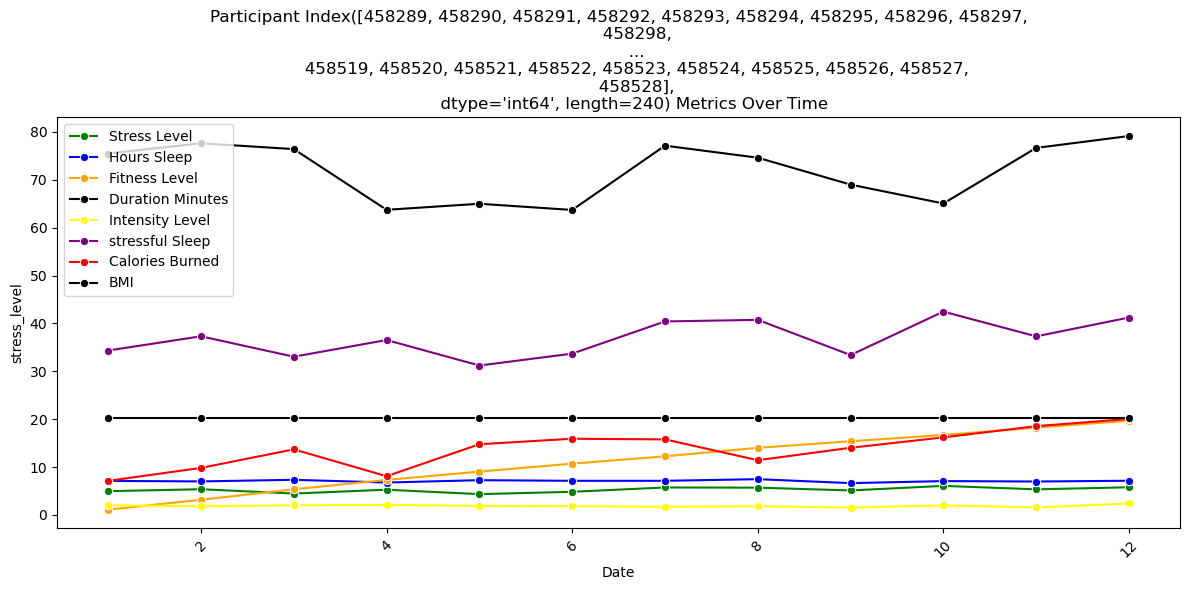

In [ ]:
participant_2000 = set_up_participants_df(hfd_df_original, 2000)

#participant_2000.head(5)
plot_participant_id_over_time(participant_2000)

In [ ]:
participant_1.head(5)

participant_id       date  age  gender  height_cm  weight_kg  \
0               1 2024-01-01   56     NaN      165.3       53.7   
1               1 2024-01-04   56     NaN      165.3       53.9   
2               1 2024-01-05   56     NaN      165.3       54.2   
3               1 2024-01-07   56     NaN      165.3       54.4   
4               1 2024-01-09   56     NaN      165.3       54.7   

     activity_type  duration_minutes intensity  calories_burned  ...  \
0          Dancing                41       Low              3.3  ...   
1         Swimming                28       Low              2.9  ...   
2         Swimming                21    Medium              2.6  ...   
3  Weight Training                99    Medium             10.7  ...   
4         Swimming               100    Medium             12.7  ...   

   fitness_level  year  month  day  weight_pds  height_in  \
0           0.04  2024      1    1  118.388094  65.078775   
1           0.07  2024      1    4  118.829018  65.078775   
2           0.09  2024      1    5  119.490404  65.078775   
3           0.21  2024      1    7  119.931328  65.078775   
4           0.33  2024      1    9  120.592714  65.078775   

   intensity_lvl_value  activity_type_value  Stressful_sleep_val  \
0                    1                    4                 19.8   
1                    1                    9                 56.7   
2                    2                    9                 43.4   
3                    2                    2                 57.6   
4                    2                    9                  7.1   

  exercise_intensity_daily_step_val  
0                              7128  
1                              7925  
2                             15114  
3                             22240  
4                             10812  

[5 rows x 31 columns]

C:\Users\jcffo\AppData\Local\Temp\ipykernel_16208\4207203412.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='stress_level', data=participant_1, ci=None, marker='o', ax=ax, color='green', label='Stress Level')
C:\Users\jcffo\AppData\Local\Temp\ipykernel_16208\4207203412.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='hours_sleep', data=participant_1, ci=None, marker='o', ax=ax, color='blue', label='Hours Sleep')
C:\Users\jcffo\AppData\Local\Temp\ipykernel_16208\4207203412.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='fitness_level', data=participant_1, ci=None, marker='o', ax=ax, color='orange', label='Fitness Level')
C:\Users\jcffo\AppData\Local\Temp\ipykernel_16208\4207203412.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorb

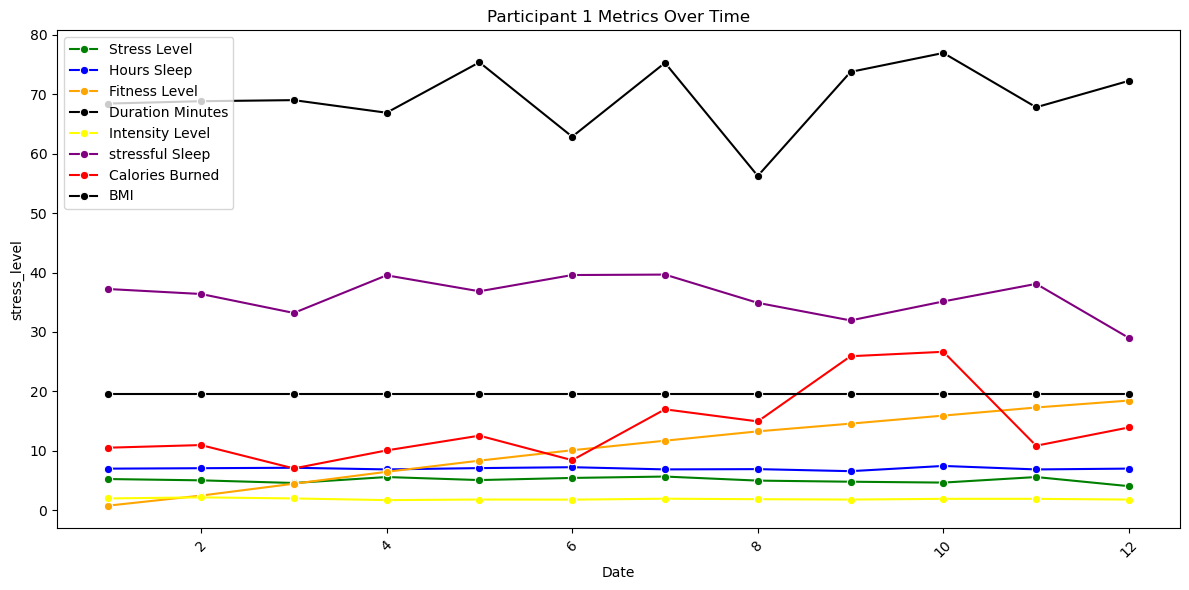

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

#sns.histplot(participant_1['hours_sleep'], bins=20, color='blue', ax=ax1, label='Hours Sleep')
#sns.histplot(participant_1['stress_level'], bins=20, color='green', ax=ax1, label='Stress Level')
#sns.histplot(participant_1['daily_steps'], bins=20, color='purple', ax=ax1, label='Daily Steps')
#sns.histplot(participant_1['avg_heart_rate'], bins=20, color='red', ax=ax1, label='Avg Heart Rate') 
#sns.histplot(participant_1['duration_minutes'], bins=20, color='orange', ax=ax1, label='Fitness Level')

#ax2 = ax1.twinx()

#sns.lineplot(x='month', y='avg_heart_rate', data=participant_1, ci=None, marker='o', ax=ax2, color='red', label='Avg Heart Rate')
sns.lineplot(x='month', y='stress_level', data=participant_1, ci=None, marker='o', ax=ax, color='green', label='Stress Level')
sns.lineplot(x='month', y='hours_sleep', data=participant_1, ci=None, marker='o', ax=ax, color='blue', label='Hours Sleep')
#sns.lineplot(x='month', y='daily_steps', data=participant_1, ci=None, marker='o', ax=ax2, color='purple', label='Daily Steps')
sns.lineplot(x='month', y='fitness_level', data=participant_1, ci=None, marker='o', ax=ax, color='orange', label='Fitness Level')
sns.lineplot(x='month', y='duration_minutes', data=participant_1, ci=None, marker='o', ax=ax, color='black', label='Duration Minutes')
sns.lineplot(x='month', y='intensity_lvl_value', data=participant_1, ci=None, marker='o', ax=ax, color='yellow', label='Intensity Level')
#sns.lineplot(x='month', y='exercise_intensity_daily_step_val', data=participant_1, ci=None, marker='o', ax=ax2, color='pink', label='Exercise Intensity Daily Step Value') 
sns.lineplot(x='month', y='Stressful_sleep_val', data=participant_1, ci=None, marker='o', ax=ax, color='purple', label='stressful Sleep')
sns.lineplot(x='month', y='calories_burned', data=participant_1, ci=None, marker='o', ax=ax, color='red', label='Calories Burned')
#sns.lineplot(x='month', y='weight_pds', data=participant_1, ci=None, marker='o', ax=ax, color='red', label='weight_pds')
sns.lineplot(x='month', y='bmi', data=participant_1, ci=None, marker='o', ax=ax, color='black', label='BMI')
ax.set_title('Participant 1 Metrics Over Time')
ax.set_xlabel('Date')

plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\jcffo\AppData\Local\Temp\ipykernel_16208\2715659739.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='avg_heart_rate', data=participant_1, ci=None, marker='o', ax=ax, color='green', label='AVG Heart Rate')
C:\Users\jcffo\AppData\Local\Temp\ipykernel_16208\2715659739.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='blood_pressure_systolic', data=participant_1, ci=None, marker='o', ax=ax, color='blue', label='blood_pressure_systolic')
C:\Users\jcffo\AppData\Local\Temp\ipykernel_16208\2715659739.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='blood_pressure_diastolic', data=participant_1, ci=None, marker='o', ax=ax, color='orange', label='blood_pressure_diastolic')
C:\Users\jcffo\AppData\Local\Temp\ipykernel_16208\2715659739.py:6: FutureWarning: 


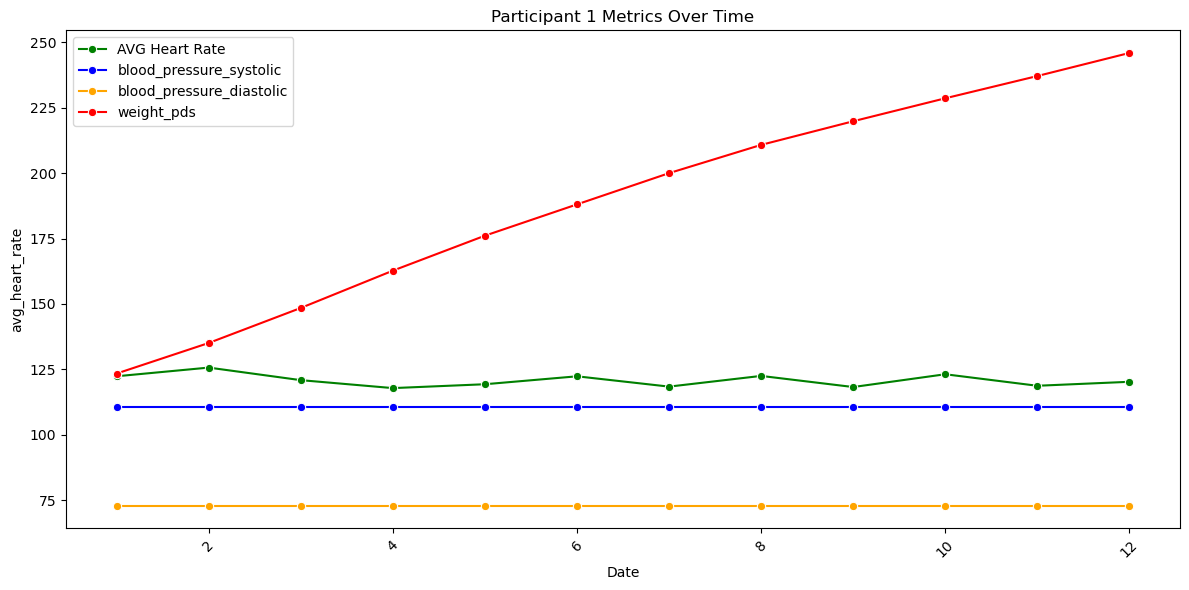

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(x='month', y='avg_heart_rate', data=participant_1, ci=None, marker='o', ax=ax, color='green', label='AVG Heart Rate')
sns.lineplot(x='month', y='blood_pressure_systolic', data=participant_1, ci=None, marker='o', ax=ax, color='blue', label='blood_pressure_systolic')
sns.lineplot(x='month', y='blood_pressure_diastolic', data=participant_1, ci=None, marker='o', ax=ax, color='orange', label='blood_pressure_diastolic')
sns.lineplot(x='month', y='weight_pds', data=participant_1, ci=None, marker='o', ax=ax, color='red', label='weight_pds')

ax.set_title('Participant 1 Metrics Over Time')
ax.set_xlabel('Date')

plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()